<a href="https://colab.research.google.com/github/ZikrullaRaxmatov/Zako_AI_Lessons/blob/main/MachineLearning_M2_3_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

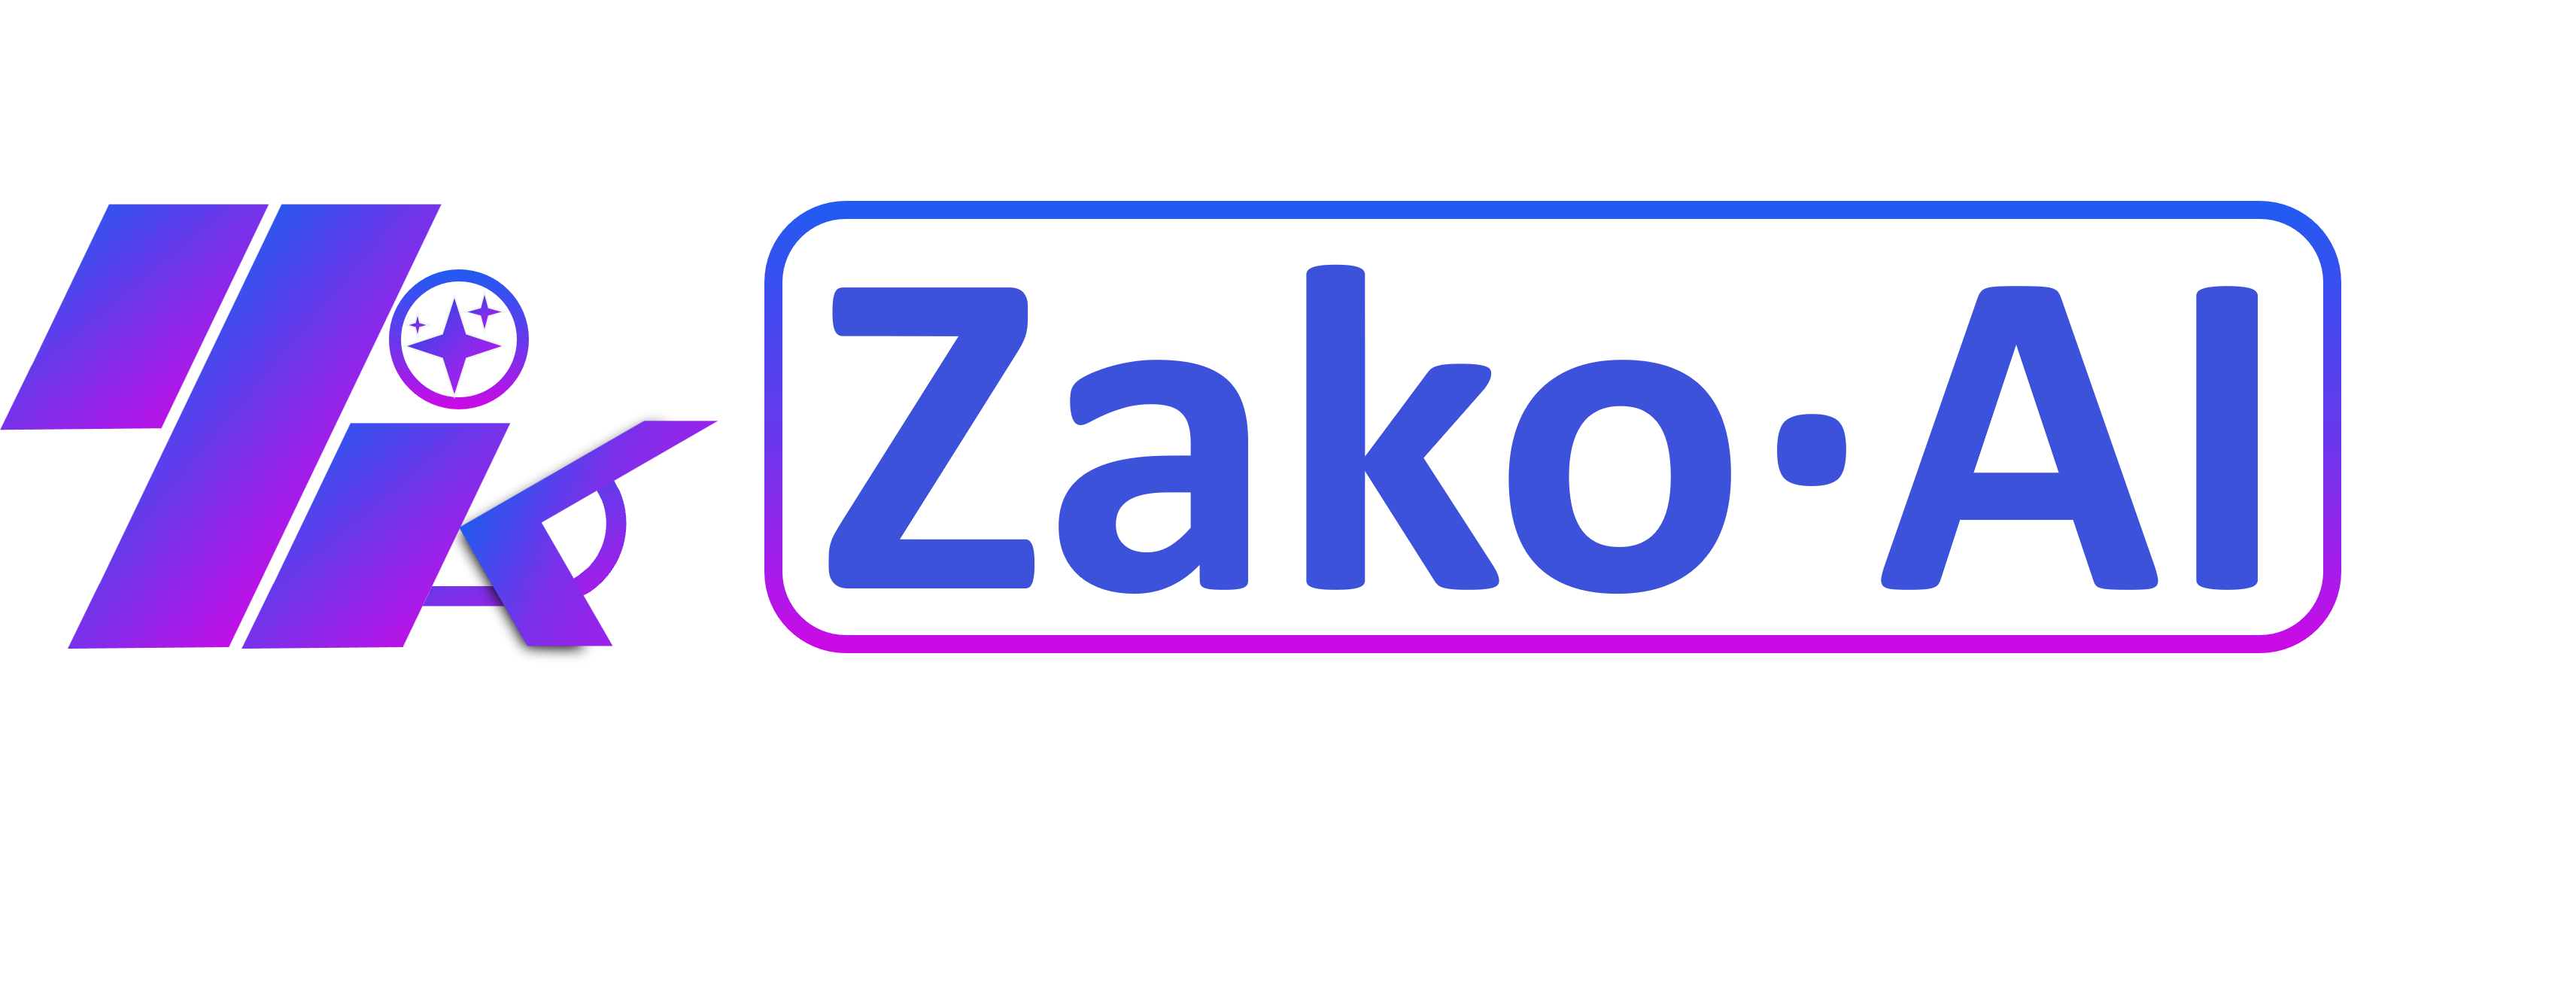

# Linear Regression (0 dan) scratchdan

## Datani normalizatsiya qilish shart, ammo biz bu yerda tashlab o'tib ketamiz

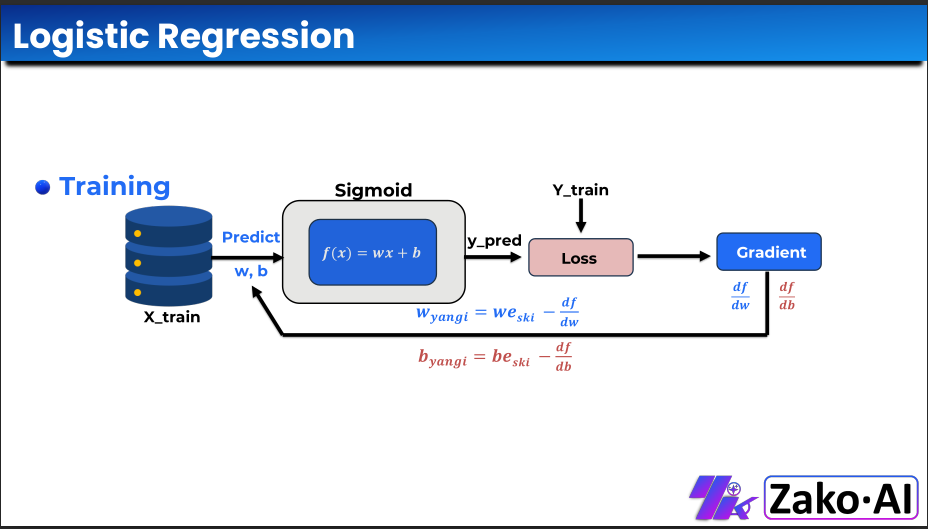

__

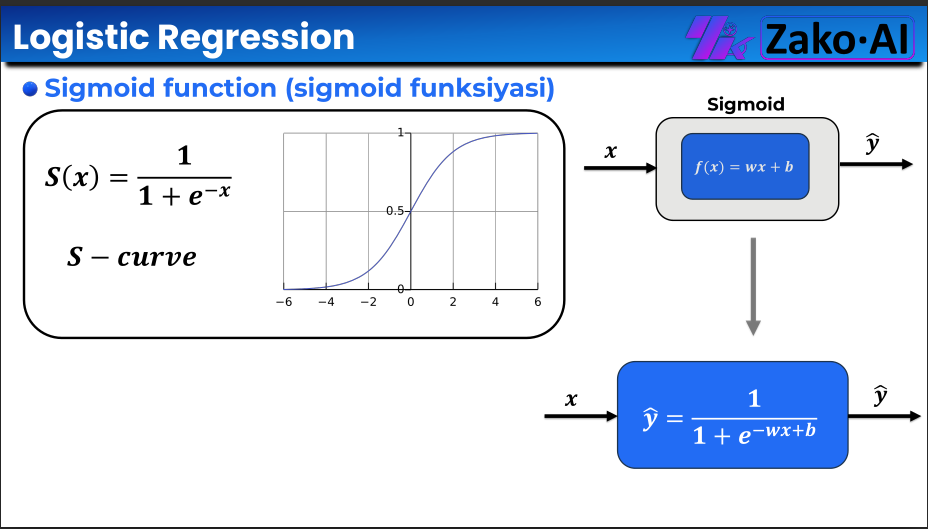

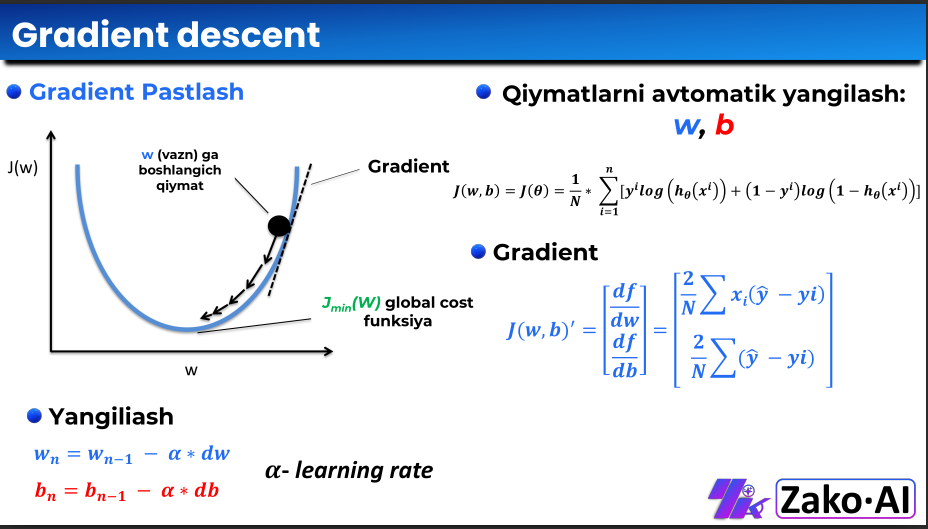

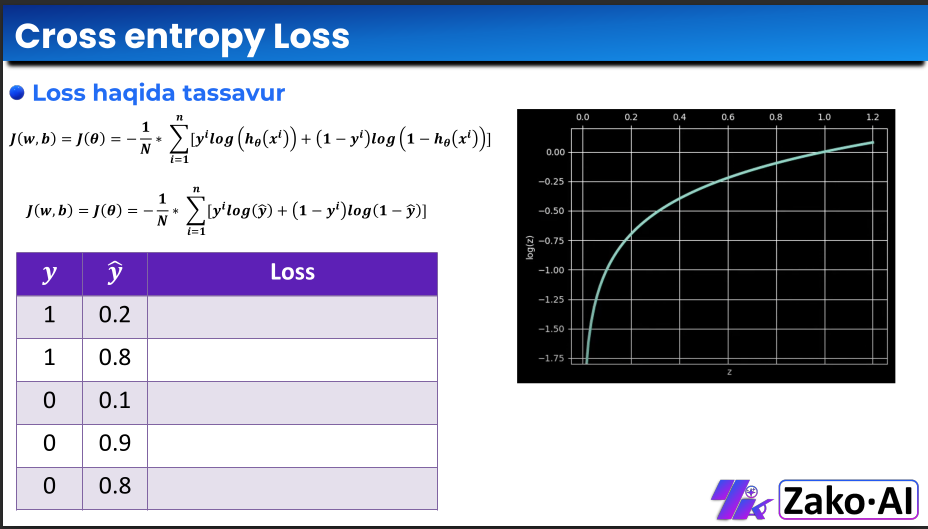

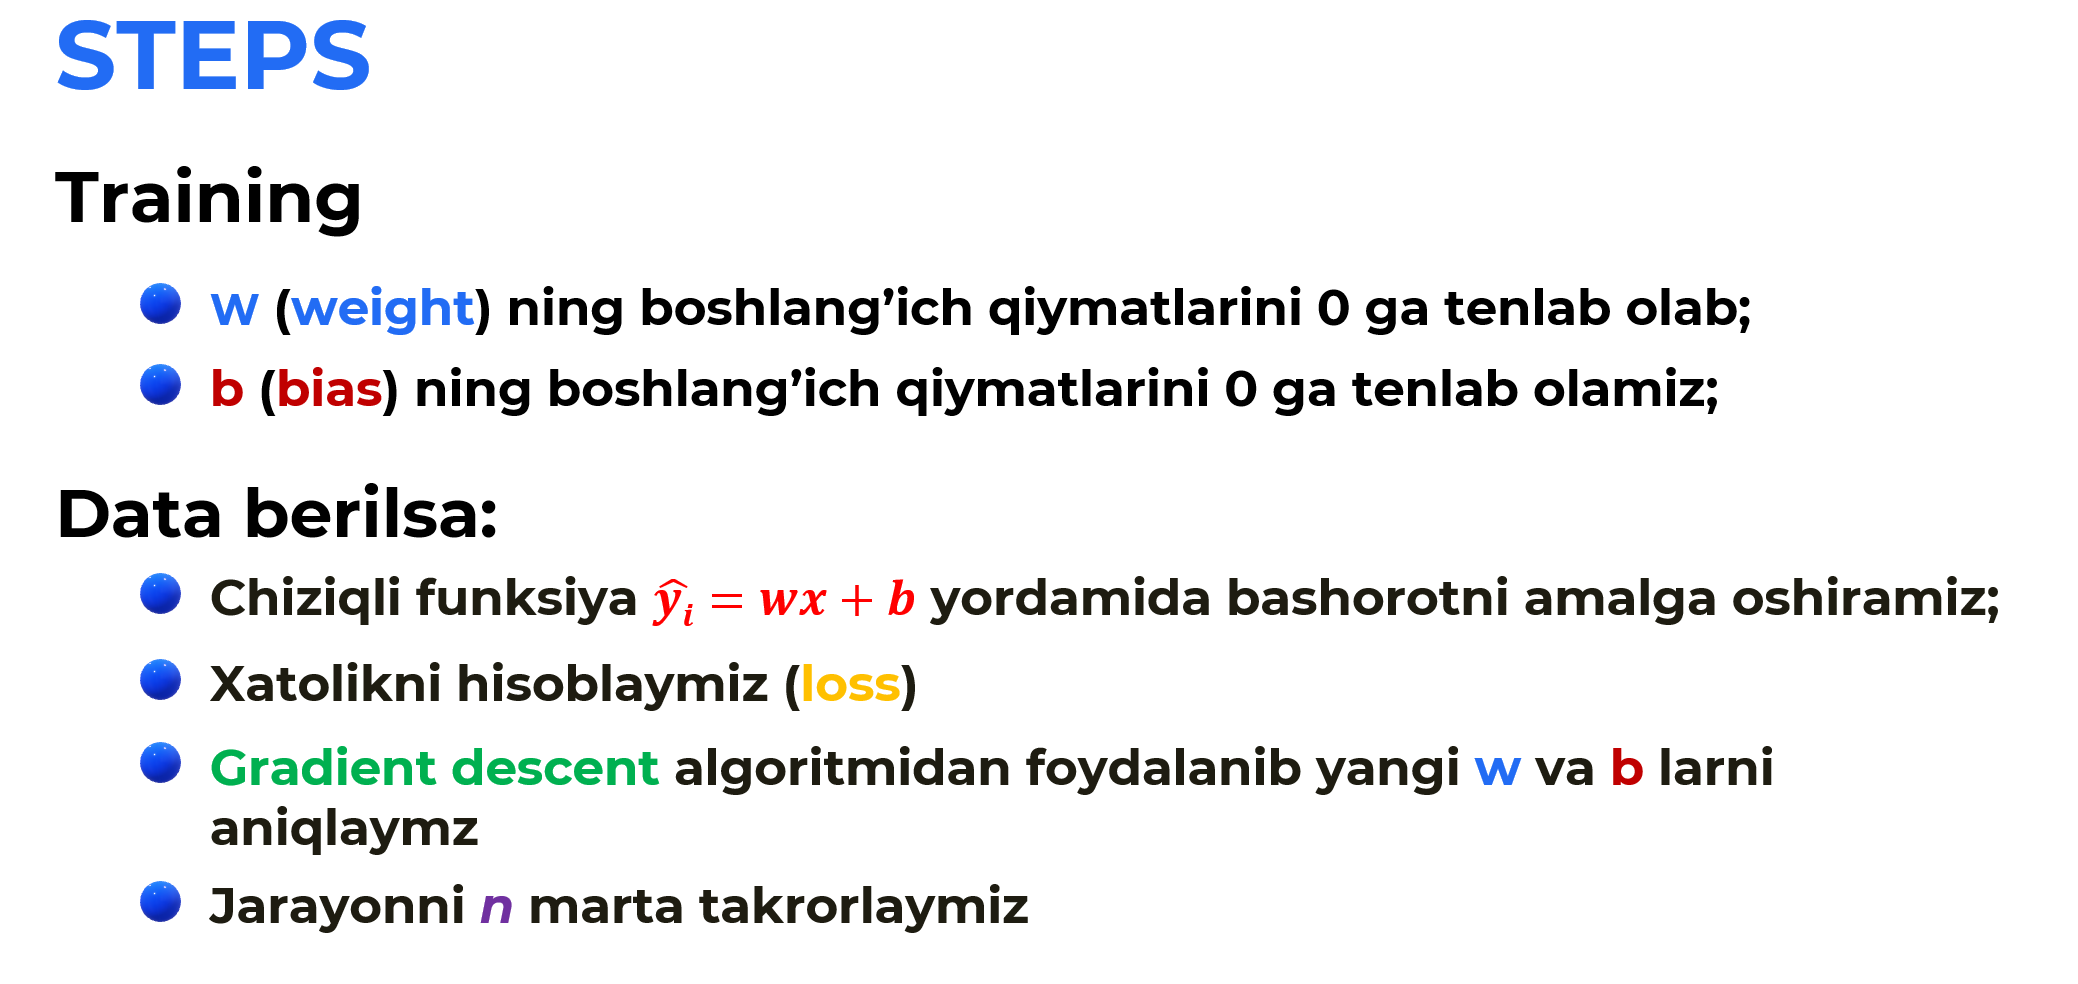

___

____

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import warnings

In [ ]:
# Creating a Logistic Regression model
warnings.filterwarnings('ignore')
history_loss = []

def sigmoid(x):
  x = np.float128(x)
  return 1/(1+np.exp(-x))

class LinearRegressor:
  def __init__(self, lr = 0.001, n_iters = 1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape

    self.weights = np.zeros(n_features)
    self.bias = 0

    for i in np.arange(self.n_iters):
      linear_pred = np.dot(X, self.weights) + self.bias
      y_pred = sigmoid(linear_pred)

      dw = (1/n_samples)*np.dot(X.T, (y_pred - y))
      db = (1/n_samples)*np.sum(y_pred - y)

      self.weights = self.weights - self.lr*dw
      self.bias = self.bias - self.lr*db

      # Cross-entropy loss
      #cross_entropy = 1/n_samples * np.sum(-(y*np.log(y_pred) + (1-y)*np.log(1-y_pred)))
      #print(f"Epoch: {i}")
      #print(f"Loss: {cross_entropy}")
      #history_loss.append(cross_entropy)

  def predict(self, X):
    linear_pred = np.dot(X, self.weights) + self.bias
    y_pred = sigmoid(linear_pred)
    class_pred = [ 0 if y < 0.5 else 1 for y in y_pred ]
    return class_pred


In [ ]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

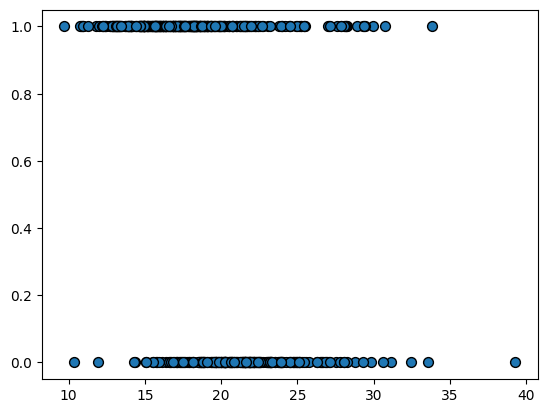

In [ ]:
# Making dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.21, random_state=0)

plt.figure()
plt.scatter(X[:, 1], y, edgecolors='k', s=50)
plt.show()

In [ ]:
# Loading the model

model = LinearRegressor(lr=0.1, n_iters=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

acc = np.sum(predictions == y_test) / len(y_test)
print(f"Accuracy: {acc}")

Accuracy: 0.9416666666666667


In [ ]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()
model2.fit(X_train, y_train)
preds2 = model2.predict(X_test)
acc2 = np.sum(preds2 == y_test) / len(y_test)
print(f"Accuracy: {acc2}")

Accuracy: 0.95


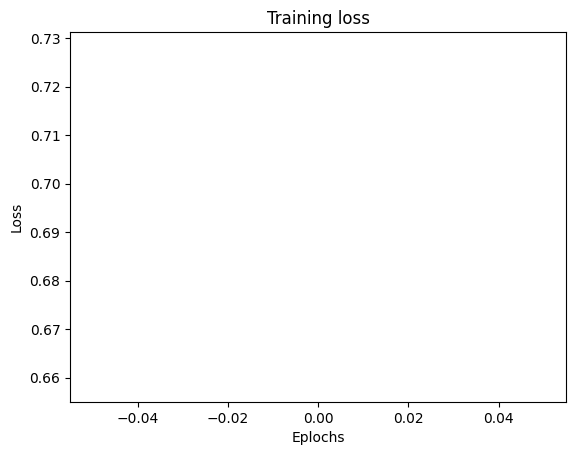

In [ ]:
# Plotting the loss

plt.plot(history_loss, color='r')
plt.title('Training loss')
plt.xlabel('Eplochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Plotting the regressor line
plt.scatter(X_train, y_train, color='b')
plt.plot(X_test, predictions, color='r')
plt.show()